**This dataset contains US national hate crime data from 1991-2020.**

@author James Kong

**Download Link:** https://crime-data-explorer.fr.cloud.gov/pages/downloads

Scroll down to "additional datasets" until you find "hate crime", then click on download. The zip file should contain a csv file. 

**Question 1:** Has black hate crime violence gone down since 1991 or increased, assuming purely anti-black sentiment (ignoring just overtly racist people to many races)?

**Question 2:** Has COVID-19 had a significant impact on hate crime rates for Asian Americans, assuming purely anti-asian sentiment (ignoring just overtly racist people to many races)?

**Question 3:** Are there any unusual spikes or trends in hate crime rates for any race?

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
df = pd.read_csv('hate_crime.csv')
df = df.fillna(0)
df

C:\Users\james\AppData\Local\Temp\ipykernel_9612\3928826405.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hate_crime.csv')


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,0,City,AR,Arkansas,West South Central,South,...,White,0,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,1318026,2020,WY0170100,Sheridan,0,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
219573,1142103,2020,WY0210100,Evanston,0,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S
219574,1318018,2020,WY0210100,Evanston,0,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S
219575,1318022,2020,WY0210100,Evanston,0,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S


In [234]:
df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,2.195770e+05,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2.080389e+05,2005.472691,0.154265,0.019251,0.955724,0.117667,0.021264,1.247567,0.969113
std,3.251394e+05,8.591466,0.661077,0.246405,1.358364,0.451448,0.227373,2.274116,1.170866
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.489600e+04,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.097900e+05,2005.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.646850e+05,2013.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.358628e+06,2020.000000,146.000000,60.000000,99.000000,60.000000,20.000000,900.000000,147.000000


In [235]:
df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Multiple Religions, Group', 'Anti-Multiple Races, Group',
       'Anti-Lesbian (Female)',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-American Indian or Alaska Native',
       'Anti-Gay (Male);Anti-White',
       'Anti-Black or African American;Anti-Jewish',
       'Anti-Black or African American;Anti-Lesbian (Female)',
       'Anti-Black or African American;Anti-Gay (Male)',
       'Anti-Black or African American;Anti-White',
       'Anti-Atheism/Agnosticism', 'Anti-Gay (Male);Anti-Jewish',
       'Anti-Bisexual', 'Anti-Hispanic or Latino;Anti-White',
       'Anti-Hispanic or Latino;Anti-Multiple Races, Group',
       'Anti-Ame

In [236]:
d0 = df['DATA_YEAR'].unique()
d0

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [237]:
d1 = df[df['BIAS_DESC'] == 'Anti-Asian']
d1

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
43,33,1991,AZ0072300,Phoenix,0,City,AZ,Arizona,Mountain,West,...,White,0,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
55,3010,1991,AZ0072300,Phoenix,0,City,AZ,Arizona,Mountain,West,...,Unknown,0,1,Intimidation,1.0,Restaurant,Anti-Asian,Individual,S,S
63,51,1991,CA0300900,Garden Grove,0,City,CA,California,Pacific,West,...,White,0,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Asian,Individual,S,S
71,77,1991,CO0010100,Aurora,0,City,CO,Colorado,Mountain,West,...,White,0,1,Aggravated Assault,1.0,Residence/Home,Anti-Asian,Individual,S,S
116,95,1991,CO0031200,Chatfield State Park,0,Other State Agency,CO,Colorado,Mountain,West,...,White,0,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219258,1337705,2020,WASPD0000,Seattle,0,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
219319,1337899,2020,WASPD0000,Seattle,0,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
219342,1331508,2020,WI0130100,Madison,0,City,WI,Wisconsin,East North Central,Midwest,...,White,Unknown,2,Simple Assault,2.0,Residence/Home,Anti-Asian,Individual,S,S
219359,1331485,2020,WI0130800,University of Wisconsin:,Madison,University or College,WI,Wisconsin,East North Central,Midwest,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,School-College/University,Anti-Asian,Business,S,S


In [238]:
d2 = df[df['BIAS_DESC'] == 'Anti-Black or African American']
d2

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,0,City,AR,Arkansas,West South Central,South,...,White,0,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
11,47,1991,AR0670000,Sevier,0,County,AR,Arkansas,West South Central,South,...,White,0,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
12,2,1991,AZ0072300,Phoenix,0,City,AZ,Arizona,Mountain,West,...,Unknown,0,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
15,5,1991,AZ0072300,Phoenix,0,City,AZ,Arizona,Mountain,West,...,White,0,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219561,956213,2020,WY0010100,Laramie,0,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
219563,890498,2020,WY0110100,Cheyenne,0,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
219567,705009,2020,WY0170100,Sheridan,0,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Park/Playground,Anti-Black or African American,Individual,S,S
219569,1009279,2020,WY0170100,Sheridan,0,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Aggravated Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


In [239]:
d3 = df[df['BIAS_DESC'] == 'Anti-White']
d3

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
1,3016,1991,AR0290100,Hope,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
6,3019,1991,AR0600200,Little Rock,0,City,AR,Arkansas,West South Central,South,...,Black or African American,0,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219537,1349518,2020,WVWSP0100,State Police:,Beckley,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Drug/Narcotic Violations,0.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Society/Public,S,S
219545,1283286,2020,WVWSP2200,State Police:,Lewisburg,State Police,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-White,Individual,S,S
219556,1283308,2020,WVWSP5200,State Police:,Wayne,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,All Other Larceny,0.0,Specialty Store,Anti-White,Business,S,S
219573,1142103,2020,WY0210100,Evanston,0,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S


In [240]:
d1 = df[df['BIAS_DESC'] == 'Anti-Asian']
asianYearList = d1['DATA_YEAR'].values
asianVictimList = d1['VICTIM_COUNT'].values

d2 = df[df['BIAS_DESC'] == 'Anti-Black or African American']
blackYearList = d2['DATA_YEAR'].values
blackVictimList = d2['VICTIM_COUNT'].values

d3 = df[df['BIAS_DESC'] == 'Anti-White']
whiteYearList = d3['DATA_YEAR'].values
whiteVictimList = d3['VICTIM_COUNT'].values

In [241]:
asianYearToVictim = {}

for year in d0:
    asianYearToVictim[year] = 0

for i in range(len(asianYearList)):
    asianYearToVictim[asianYearList[i]] += asianVictimList[i]

asianYearToVictim.values()

dict_values([341, 290, 319, 280, 496, 544, 465, 375, 385, 338, 363, 282, 293, 274, 253, 243, 236, 179, 150, 203, 174, 168, 163, 200, 139, 137, 161, 178, 246, 485])

In [242]:
blackYearToVictim = {}

for year in d0:
    blackYearToVictim[year] = 0

for i in range(len(blackYearList)):
    blackYearToVictim[blackYearList[i]] += blackVictimList[i]

blackYearToVictim.values()

dict_values([2066, 2968, 3569, 2746, 3945, 4603, 3984, 3783, 3715, 3613, 3745, 3102, 3176, 3499, 3365, 3311, 3458, 3688, 2919, 2766, 2647, 2588, 2440, 2053, 2228, 2256, 2497, 2417, 2641, 4615])

In [243]:
whiteYearToVictim = {}

for year in d0:
    whiteYearToVictim[year] = 0

for i in range(len(whiteYearList)):
    whiteYearToVictim[whiteYearList[i]] += whiteVictimList[i]

whiteYearToVictim.values()

dict_values([1096, 1736, 1854, 1317, 1556, 1445, 1313, 1017, 1003, 1118, 996, 896, 1021, 1027, 964, 1023, 900, 876, 660, 699, 616, 798, 771, 753, 791, 931, 833, 1049, 787, 1431])

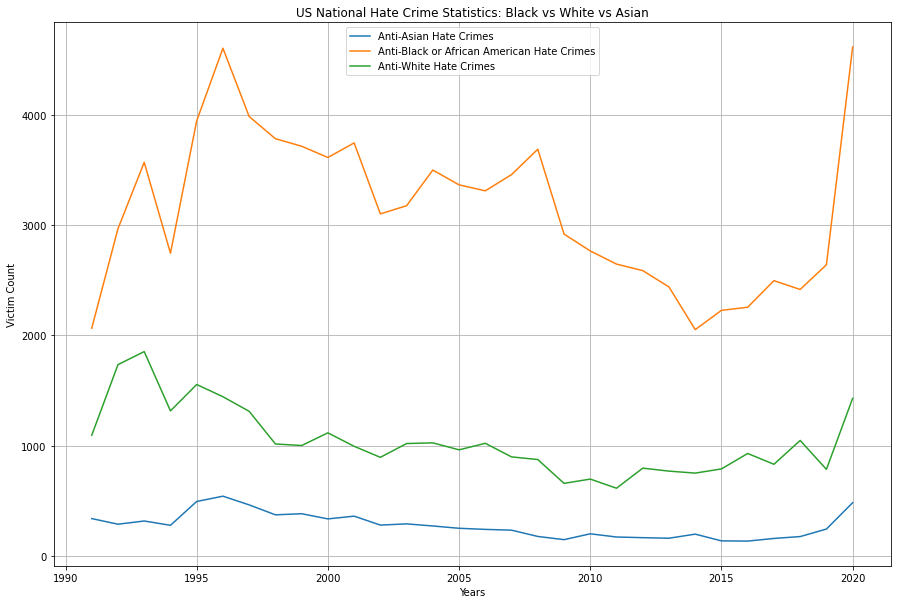

In [244]:
plt.figure(figsize=(15,10))

bias = 'Anti-Asian Hate Crimes'
plt.plot(asianYearToVictim.keys(), asianYearToVictim.values(), label=bias)

bias = 'Anti-Black or African American Hate Crimes'
plt.plot(blackYearToVictim.keys(), blackYearToVictim.values(), label=bias)

bias = 'Anti-White Hate Crimes'
plt.plot(whiteYearToVictim.keys(), whiteYearToVictim.values(), label=bias)

plt.title("US National Hate Crime Statistics: Black vs White vs Asian")
plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

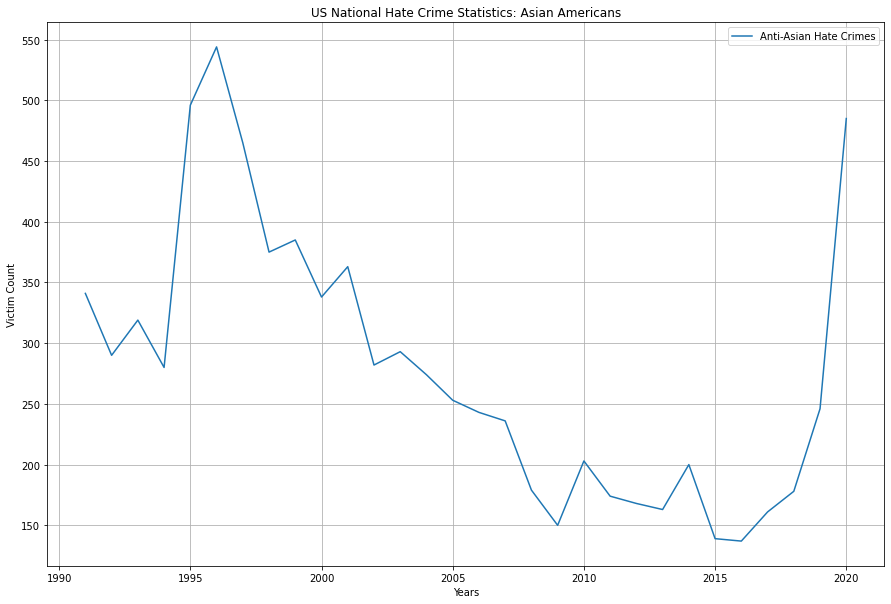

In [245]:
plt.figure(figsize=(15,10))

bias = 'Anti-Asian Hate Crimes'
plt.plot(asianYearToVictim.keys(), asianYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: Asian Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

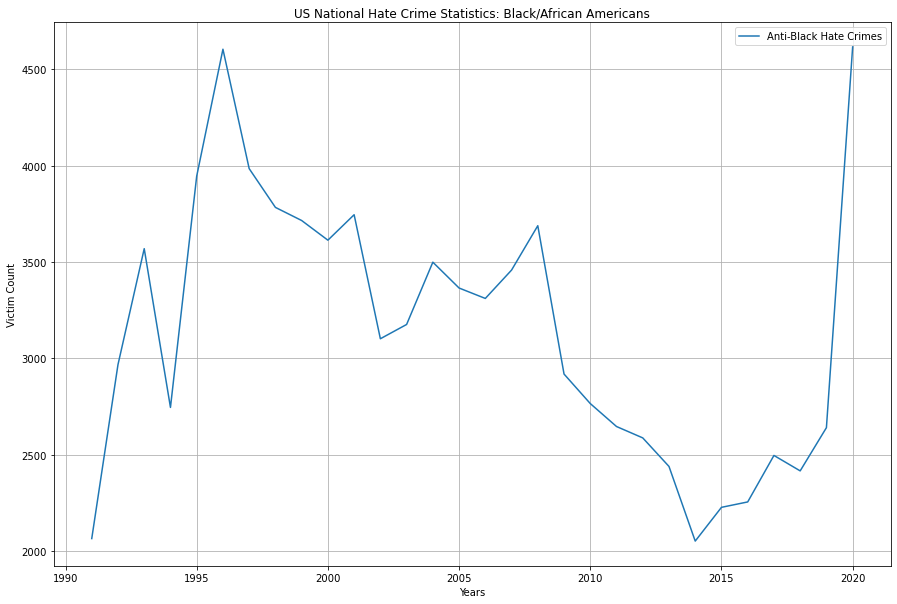

In [246]:
plt.figure(figsize=(15,10))

bias = 'Anti-Black Hate Crimes'
plt.plot(blackYearToVictim.keys(), blackYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: Black/African Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

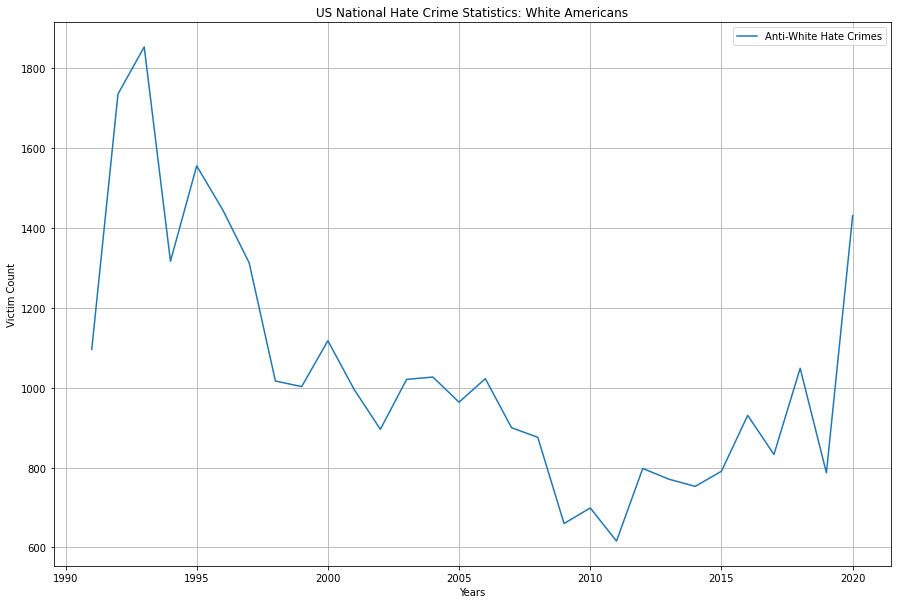

In [247]:
plt.figure(figsize=(15,10))

bias = 'Anti-White Hate Crimes'
plt.plot(whiteYearToVictim.keys(), whiteYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: White Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

In [248]:
df2 = pd.pivot_table(df, values="VICTIM_COUNT", index=['DATA_YEAR'], columns=["BIAS_DESC"])
df2 = df2.fillna(0)
df2

BIAS_DESC,Anti-American Indian or Alaska Native,Anti-American Indian or Alaska Native;Anti-Asian,Anti-American Indian or Alaska Native;Anti-Black or African American,Anti-American Indian or Alaska Native;Anti-Black or African American;Anti-Hispanic or Latino;Anti-Jewish;Anti-Other Race/Ethnicity/Ancestry,Anti-American Indian or Alaska Native;Anti-Hispanic or Latino,Anti-American Indian or Alaska Native;Anti-Islamic (Muslim),Anti-American Indian or Alaska Native;Anti-Native Hawaiian or Other Pacific Islander,Anti-American Indian or Alaska Native;Anti-Other Race/Ethnicity/Ancestry,Anti-American Indian or Alaska Native;Anti-White,Anti-Arab,...,Anti-Other Religion;Anti-White,Anti-Physical Disability,Anti-Physical Disability;Anti-White,Anti-Protestant,Anti-Protestant;Anti-White,Anti-Sikh,Anti-Transgender,Anti-Transgender;Anti-White,Anti-White,Unknown (offender's motivation not known)
DATA_YEAR,,,,,,,,,,,,,,,,,,,,,
1991,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.383562,...,0.0,0.000000,0.0,1.076923,0.0,0.000000,0.000000,0.0,1.309438,0.0
1992,1.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.383333,...,0.0,0.000000,0.0,1.071429,0.0,0.000000,0.000000,0.0,1.286879,0.0
1993,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236364,...,0.0,0.000000,0.0,1.266667,0.0,0.000000,0.000000,0.0,1.256098,0.0
1994,1.166667,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.269231,...,0.0,0.000000,0.0,1.366667,0.0,0.000000,0.000000,0.0,1.298817,0.0
1995,1.439024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.272727,...,0.0,0.000000,0.0,1.805556,0.0,0.000000,0.000000,0.0,1.267101,0.0
1996,1.392157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.275000,...,0.0,0.000000,0.0,1.080000,0.0,0.000000,0.000000,0.0,1.306510,0.0
1997,1.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.441176,...,0.0,1.000000,0.0,1.148148,0.0,0.000000,0.000000,0.0,1.301288,0.0
1998,1.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.320000,...,0.0,1.076923,0.0,1.050000,0.0,0.000000,0.000000,0.0,1.266501,0.0
1999,1.061224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,...,0.0,1.375000,0.0,1.060000,0.0,0.000000,0.000000,0.0,1.272843,0.0


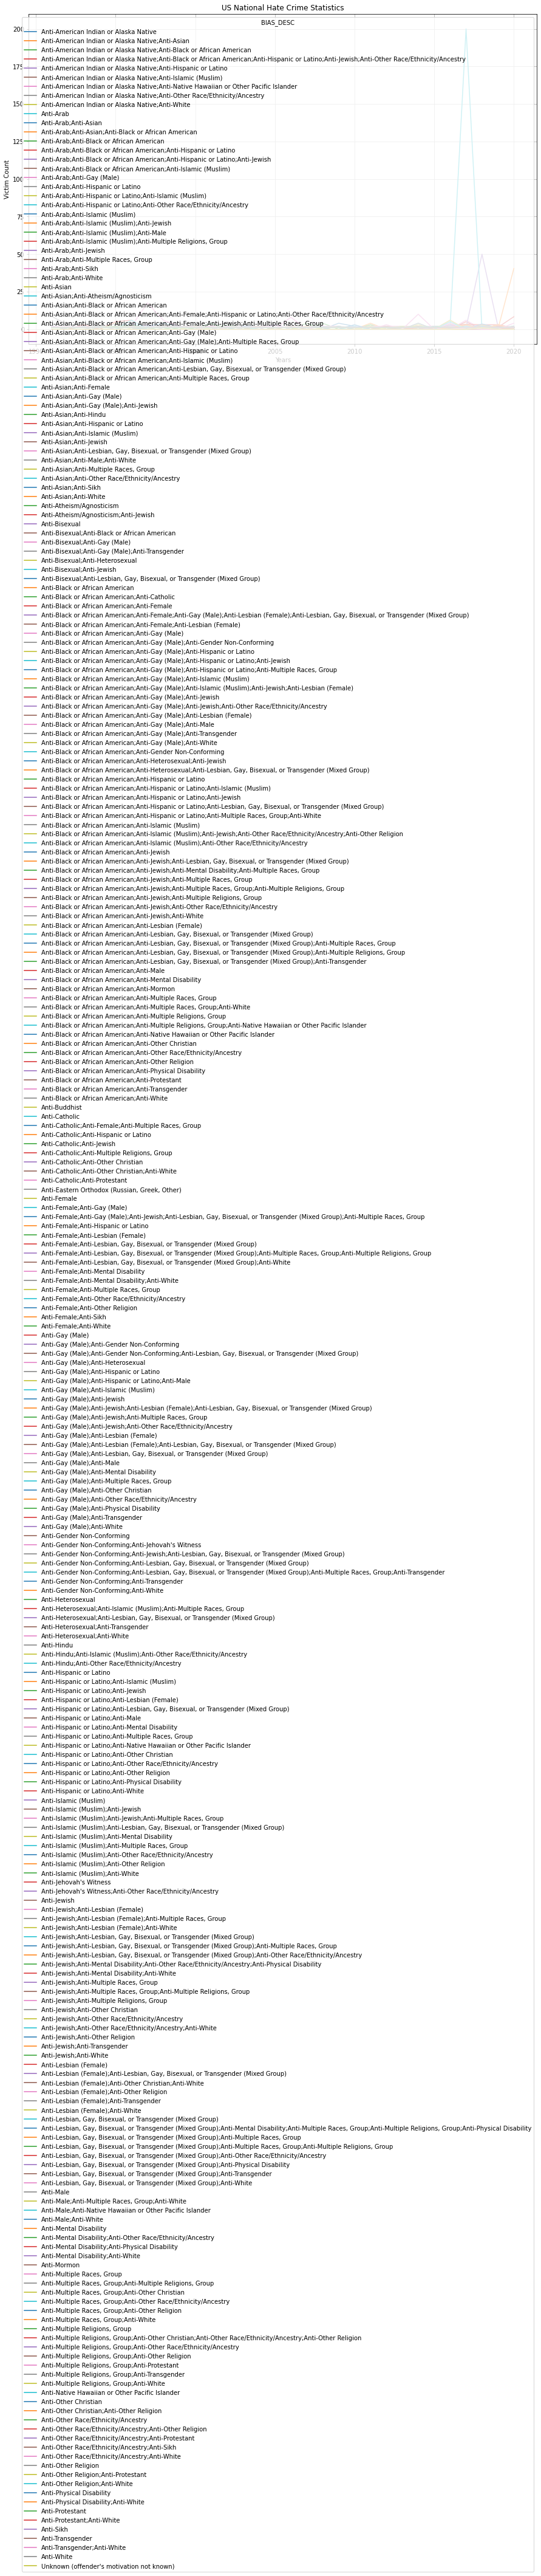

In [249]:
df2.plot(figsize=(15,10))
plt.title("US National Hate Crime Statistics")
plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.grid()

In [250]:
races = df.groupby('BIAS_DESC')['VICTIM_COUNT'].agg(sum)
races = races.sort_values(ascending=False)
races

BIAS_DESC
Anti-Black or African American                                                                                                     94403
Anti-Jewish                                                                                                                        32135
Anti-White                                                                                                                         31277
Anti-Gay (Male)                                                                                                                    26030
Anti-Hispanic or Latino                                                                                                            19026
                                                                                                                                   ...  
Anti-Catholic;Anti-Other Christian;Anti-White                                                                                          1
Anti-Female;Anti-Gay (Male);Ant

In [251]:
races.head(25)

BIAS_DESC
Anti-Black or African American                               94403
Anti-Jewish                                                  32135
Anti-White                                                   31277
Anti-Gay (Male)                                              26030
Anti-Hispanic or Latino                                      19026
Anti-Other Race/Ethnicity/Ancestry                           13218
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)     8486
Anti-Asian                                                    8360
Anti-Multiple Races, Group                                    7565
Anti-Lesbian (Female)                                         6587
Anti-Islamic (Muslim)                                         4746
Anti-Other Religion                                           4414
Anti-American Indian or Alaska Native                         2825
Anti-Catholic                                                 1839
Anti-Arab                                           

**Final Analysis**


**Question 1:** Has black hate crime violence gone down since 1991 or increased, assuming purely anti-black sentiment (ignoring just overtly racist people to many races)?

It has decreased significantly in general but the number of hate crimes against Black/African Americans is significantly greater in proportion to all other races. You can especially notice this from the groupby function results above. 

**Question 2:** Has COVID-19 had a significant impact on hate crime rates for Asian Americans, assuming purely anti-asian sentiment (ignoring just overtly racist people to many races)?

It is hard to say since both white and black hate crimes also had a similar trend of going up towards 2020. Additionally, since there is a lack of updated data for 2020 and beyond, it is hard to say there was a significant spike due to lack of data. All other data in the chart was based off multiple years of data, so results are undeterminable based off of this dataset. 

**Question 3:** Are there any unusual spikes or trends in hate crime rates for any race?

Around 1996, all races exhibited strange spikes/peaks in hate crime rates, most noteably Black/African Americans and Asian Americans. It was hard to find a possible explanation for this behavior, but I did find that 30 African American churches were burned in 1995 from hate crimes. As for Asian Americans, Anti-immigrant hate groups proliferated since the late 1990s with hundreds of nativist and vigilante groups active. Asian immigrants first came to the United States in the 19th century but perhaps there was influx of asian immigrants during the 1990s and thus resulted in increased activity from these anti-immigrant hate groups. 

Additionally, what's interesting is that all hate crime rates seem to have a gradual trend downward following the 2000s years. This trend could possibly be explained by mass cultural anti-racism education and sentiments being spread along with more politically correct behaviors being adopted into American society.

